In [436]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [437]:
np.random.seed(42)

In [438]:
#Generate n synthetic samples (not a real dataset, randomly generated)

n=100
#Class 0
X1 = np.random.normal(loc=-2.0, scale=2, size=int(n/2))
Y1 = np.random.normal(loc=0, scale=1, size=int(n/2))
#Class 1
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Y2 = np.random.normal(loc=0, scale=1.0, size=int(n/2))

In [439]:
# Columns are features (dims) and class labels are the last column
ds1 = np.empty([n, 3])
size = int(n/2)
for i in range(size):
        ds1[i] = [X1[i], Y1[i], 0]
        ds1[i+size] = [X2[i], Y2[i], 1]

In [440]:
df = pd.DataFrame({'Dim 1':ds1[:, 0], 'Dim 2':ds1[:, 1], 'Class labels':ds1[:, -1]})
print(df)

       Dim 1     Dim 2  Class labels
0  -1.006572  0.324084           0.0
1  -2.276529 -0.385082           0.0
2  -0.704623 -0.676922           0.0
3   1.046060  0.611676           0.0
4  -2.468307  1.031000           0.0
..       ...       ...           ...
95  3.563646  0.385317           1.0
96 -0.473901 -0.883857           1.0
97 -0.640913  0.153725           1.0
98  3.043883  0.058209           1.0
99  2.593969 -1.142970           1.0

[100 rows x 3 columns]


In [441]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=0)

In [442]:
train_df = pd.DataFrame({'X1':x_train.iloc[:,0], 'X2':x_train.iloc[:,1], 'Y':y_train}, columns=['X1', 'X2', 'Y'])

In [443]:
def knn(newObservation, referenceData, k=3):
    data = referenceData.iloc[:, :-1]
    labels = referenceData.iloc[:, -1]    
    size = data.shape[0]
    
    # List of distances between new data pt and dataset pts
    distance = np.array((None, None) * int(size/2))
    
    for i in range(size):
        x_diff = np.square(data.iloc[i, 0] - newObservation[0])
        y_diff = np.square(data.iloc[i, 1] - newObservation[1])
        distance[i] = ((np.sqrt(x_diff + y_diff)), labels.iloc[i])
        
    distance = np.sort(distance, axis=0)
    
    c0_count = 0
    c1_count = 0
    
    for i in range(0, k):
        if distance[i][1] == 0:
            c0_count+=1
        elif distance[i][1] == 1:
            c1_count+=1
    
    if c0_count > c1_count:
        return 0.0
    return 1.0

In [451]:
#check how many predictions are correct in test set.

counter = 0
corr_counter = 0

results = np.empty((x_test.shape[0], 1))


for i in range(x_test.shape[0]):
    result = knn(x_test.iloc[i], train_df, k=3)
    results[i] = result
    print(x_test.iloc[i].values)
    print('actual')
    print(result)
    print('expected')
    print('Class ' + str(y_test.iloc[i]))
    print()
    
    if (result == y_test.iloc[i]):
        corr_counter+=1
    counter +=1
    
print(str(corr_counter) + ' correct predictions out of ' + str(counter))


[-4.30198715  0.08704707]
actual
0.0
expected
Class 0.0

[0.43349342 0.47323762]
actual
0.0
expected
Class 1.0

[-0.70462292 -0.676922  ]
actual
0.0
expected
Class 0.0

[ 2.80810171 -0.71435142]
actual
1.0
expected
Class 1.0

[6.38091125 0.82718325]
actual
1.0
expected
Class 1.0

[ 2.36926772 -1.24573878]
actual
1.0
expected
Class 1.0

[-4.02566224 -0.07201012]
actual
0.0
expected
Class 0.0

[-0.80370213  0.34115197]
actual
1.0
expected
Class 1.0

[1.67742858 0.29307247]
actual
1.0
expected
Class 1.0

[3.56364574 0.38531738]
actual
1.0
expected
Class 1.0

[0.39544546 0.2322537 ]
actual
1.0
expected
Class 1.0

[-1.21496647  0.21409374]
actual
0.0
expected
Class 1.0

[ 2.19930273 -0.26465683]
actual
1.0
expected
Class 1.0

[-5.82656049 -1.19620662]
actual
0.0
expected
Class 0.0

[-0.46513054 -0.30921238]
actual
0.0
expected
Class 0.0

[-3.20341322 -0.21967189]
actual
0.0
expected
Class 0.0

[-1.86494359 -0.03582604]
actual
0.0
expected
Class 0.0

[-3.08876545 -2.6197451 ]
actual
0.0
expe

Text(0.5, 1.0, 'Actual labels')

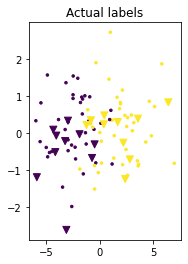

In [452]:
plt.subplot(1, 2, 1)
plt.scatter(x_train.iloc[:,0], x_train.iloc[:, 1], s=25, c=y_train, marker='.')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1], s=50, c=y_test, marker="v")
plt.title('Actual labels')

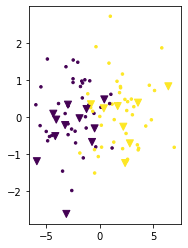

In [453]:
plt.subplot(1, 2, 2)
# plt.scatter(x_train.iloc[:,0], x_train.iloc[:, 1], s=25, c=y_train, marker='.')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1], s=50, c=results, marker="v")
